<a href="https://colab.research.google.com/github/lmaheshds/computervision_wrapper/blob/main/cifar10resnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Training Concepts

In [1]:
import torch
import torch.optim as optim

from torchsummary import summary
from torch.optim.lr_scheduler import StepLR, OneCycleLR, ReduceLROnPlateau

import os
import numpy as np

In [10]:
%%capture 
!git clone https://github.com/lmaheshds/computervision_wrapper.git

In [9]:
!pip install albumentations==1.0.0

In [11]:
from computervision_wrapper import main as main
from computervision_wrapper.model import resnet as models
from computervision_wrapper.utils import utils as utils
from computervision_wrapper.utils.gradcam import generate_gradcam, plot_gradcam_images

SyntaxError: ignored

## Data Loader & Albumentations

In [12]:
norm_mean,norm_std = utils.cifar10_mean_std()
train_transform, test_transform = utils.get_transforms(norm_mean,norm_std)

# Extract and transform the data
train_set,test_set = utils.get_datasets(train_transform,test_transform)

# Targets -> ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
classes = train_set.classes

# Dataloader Arguments & Test/Train Dataloaders - Load part of ETL
train_loader,test_loader = utils.get_dataloaders(train_set,test_set)

NameError: ignored

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Displaying 10 images


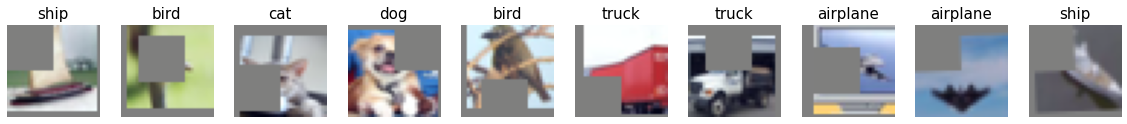

In [ ]:
# Explore sample images
utils.show_sample_images(train_loader, classes, .5, .25, num_of_images = 10)

## Model Summary

In [ ]:
# Model summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = models.ResNet18("LN").to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
         GroupNorm-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
         GroupNorm-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
         GroupNorm-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
         GroupNorm-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
        GroupNorm-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 32, 32]          73,728
        GroupNorm-14          [-1,

## Training & Testing the Model

In [ ]:
EPOCH = 40
batch_size = 256
l1_factor = 0
l2_factor = 0.0001
lr_value = 0.001
mt_val = 0.9

cuda = torch.cuda.is_available()
device = torch.device("cuda" if cuda else "cpu")

utils.seed_everything(1)

optimizer = optim.Adam(model.parameters(), lr=lr_value, weight_decay=l2_factor)
scheduler = ReduceLROnPlateau(optimizer, factor=0.2, patience=3,verbose=True,mode='max')

print("------------------------------------------")
train_loss, test_loss, train_acc, test_acc = main.main(EPOCH, model, device, train_loader, test_loader, optimizer, scheduler, l1_factor)

------------------------------------------

Epoch 1 : 
Train set: Average loss: 1.9146, Accuracy: 20.84

Test set: Average loss: 0.014, Accuracy: 32.24

Epoch 2 : 
Train set: Average loss: 1.4603, Accuracy: 33.24

Test set: Average loss: 0.013, Accuracy: 40.19

Epoch 3 : 
Train set: Average loss: 1.6729, Accuracy: 39.61

Test set: Average loss: 0.012, Accuracy: 45.57

Epoch 4 : 
Train set: Average loss: 1.7333, Accuracy: 44.14

Test set: Average loss: 0.011, Accuracy: 48.95

Epoch 5 : 
Train set: Average loss: 1.4983, Accuracy: 47.76

Test set: Average loss: 0.010, Accuracy: 52.68

Epoch 6 : 
Train set: Average loss: 1.1464, Accuracy: 52.03

Test set: Average loss: 0.009, Accuracy: 60.19

Epoch 7 : 
Train set: Average loss: 1.0398, Accuracy: 55.83

Test set: Average loss: 0.009, Accuracy: 60.72

Epoch 8 : 
Train set: Average loss: 0.9112, Accuracy: 59.17

Test set: Average loss: 0.008, Accuracy: 65.76

Epoch 9 : 
Train set: Average loss: 1.1069, Accuracy: 61.95

Test set: Average loss:

## Accuracy and Loss Plots

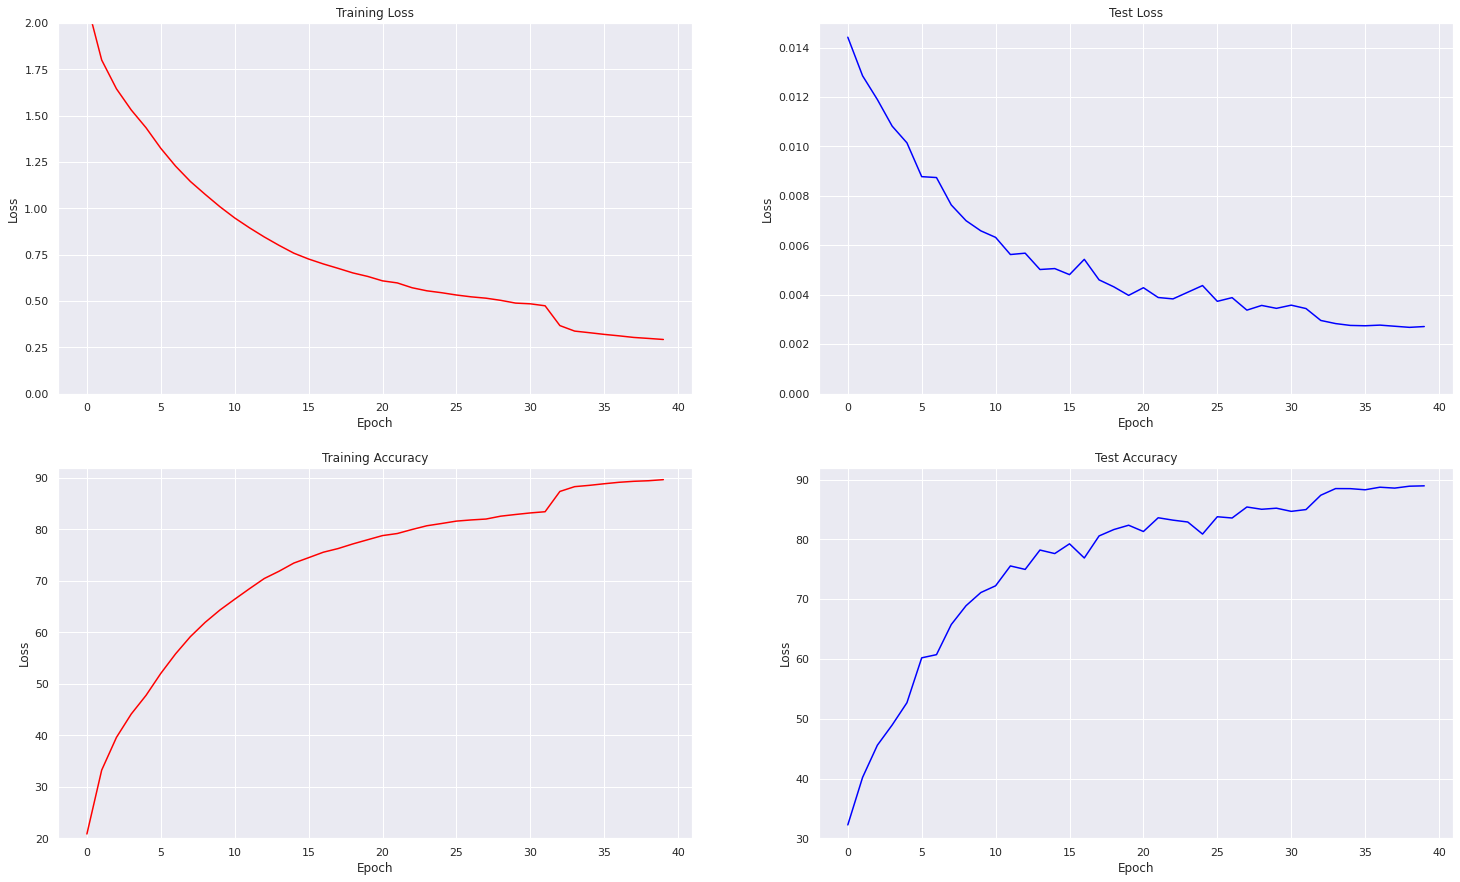

In [ ]:
utils.valid_accuracy_loss_plots(train_loss, train_acc, test_loss, test_acc)

## Misclassified images

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Total wrong predictions are 1104


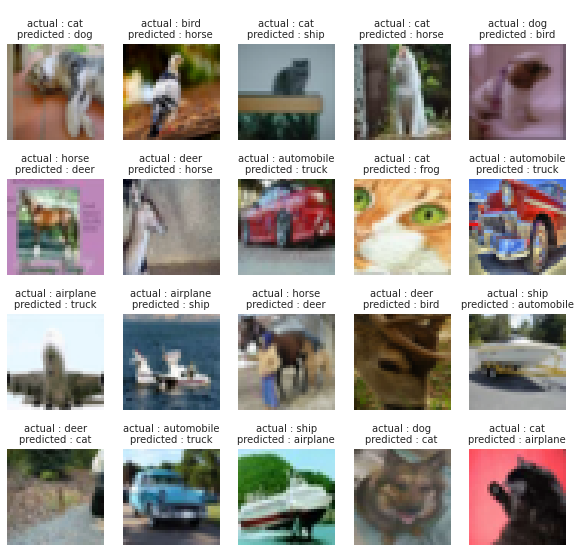

In [ ]:
misclassified_images = utils.wrong_predictions(model,test_loader, norm_mean, norm_std, classes, device)

## GradCAM images for same 20 misclassified images 

In [ ]:
%%capture
target_layers = ["layer1","layer2","layer3","layer4"]
gradcam_output, probs, predicted_classes = generate_gradcam(misclassified_images[:20], model, target_layers,device)

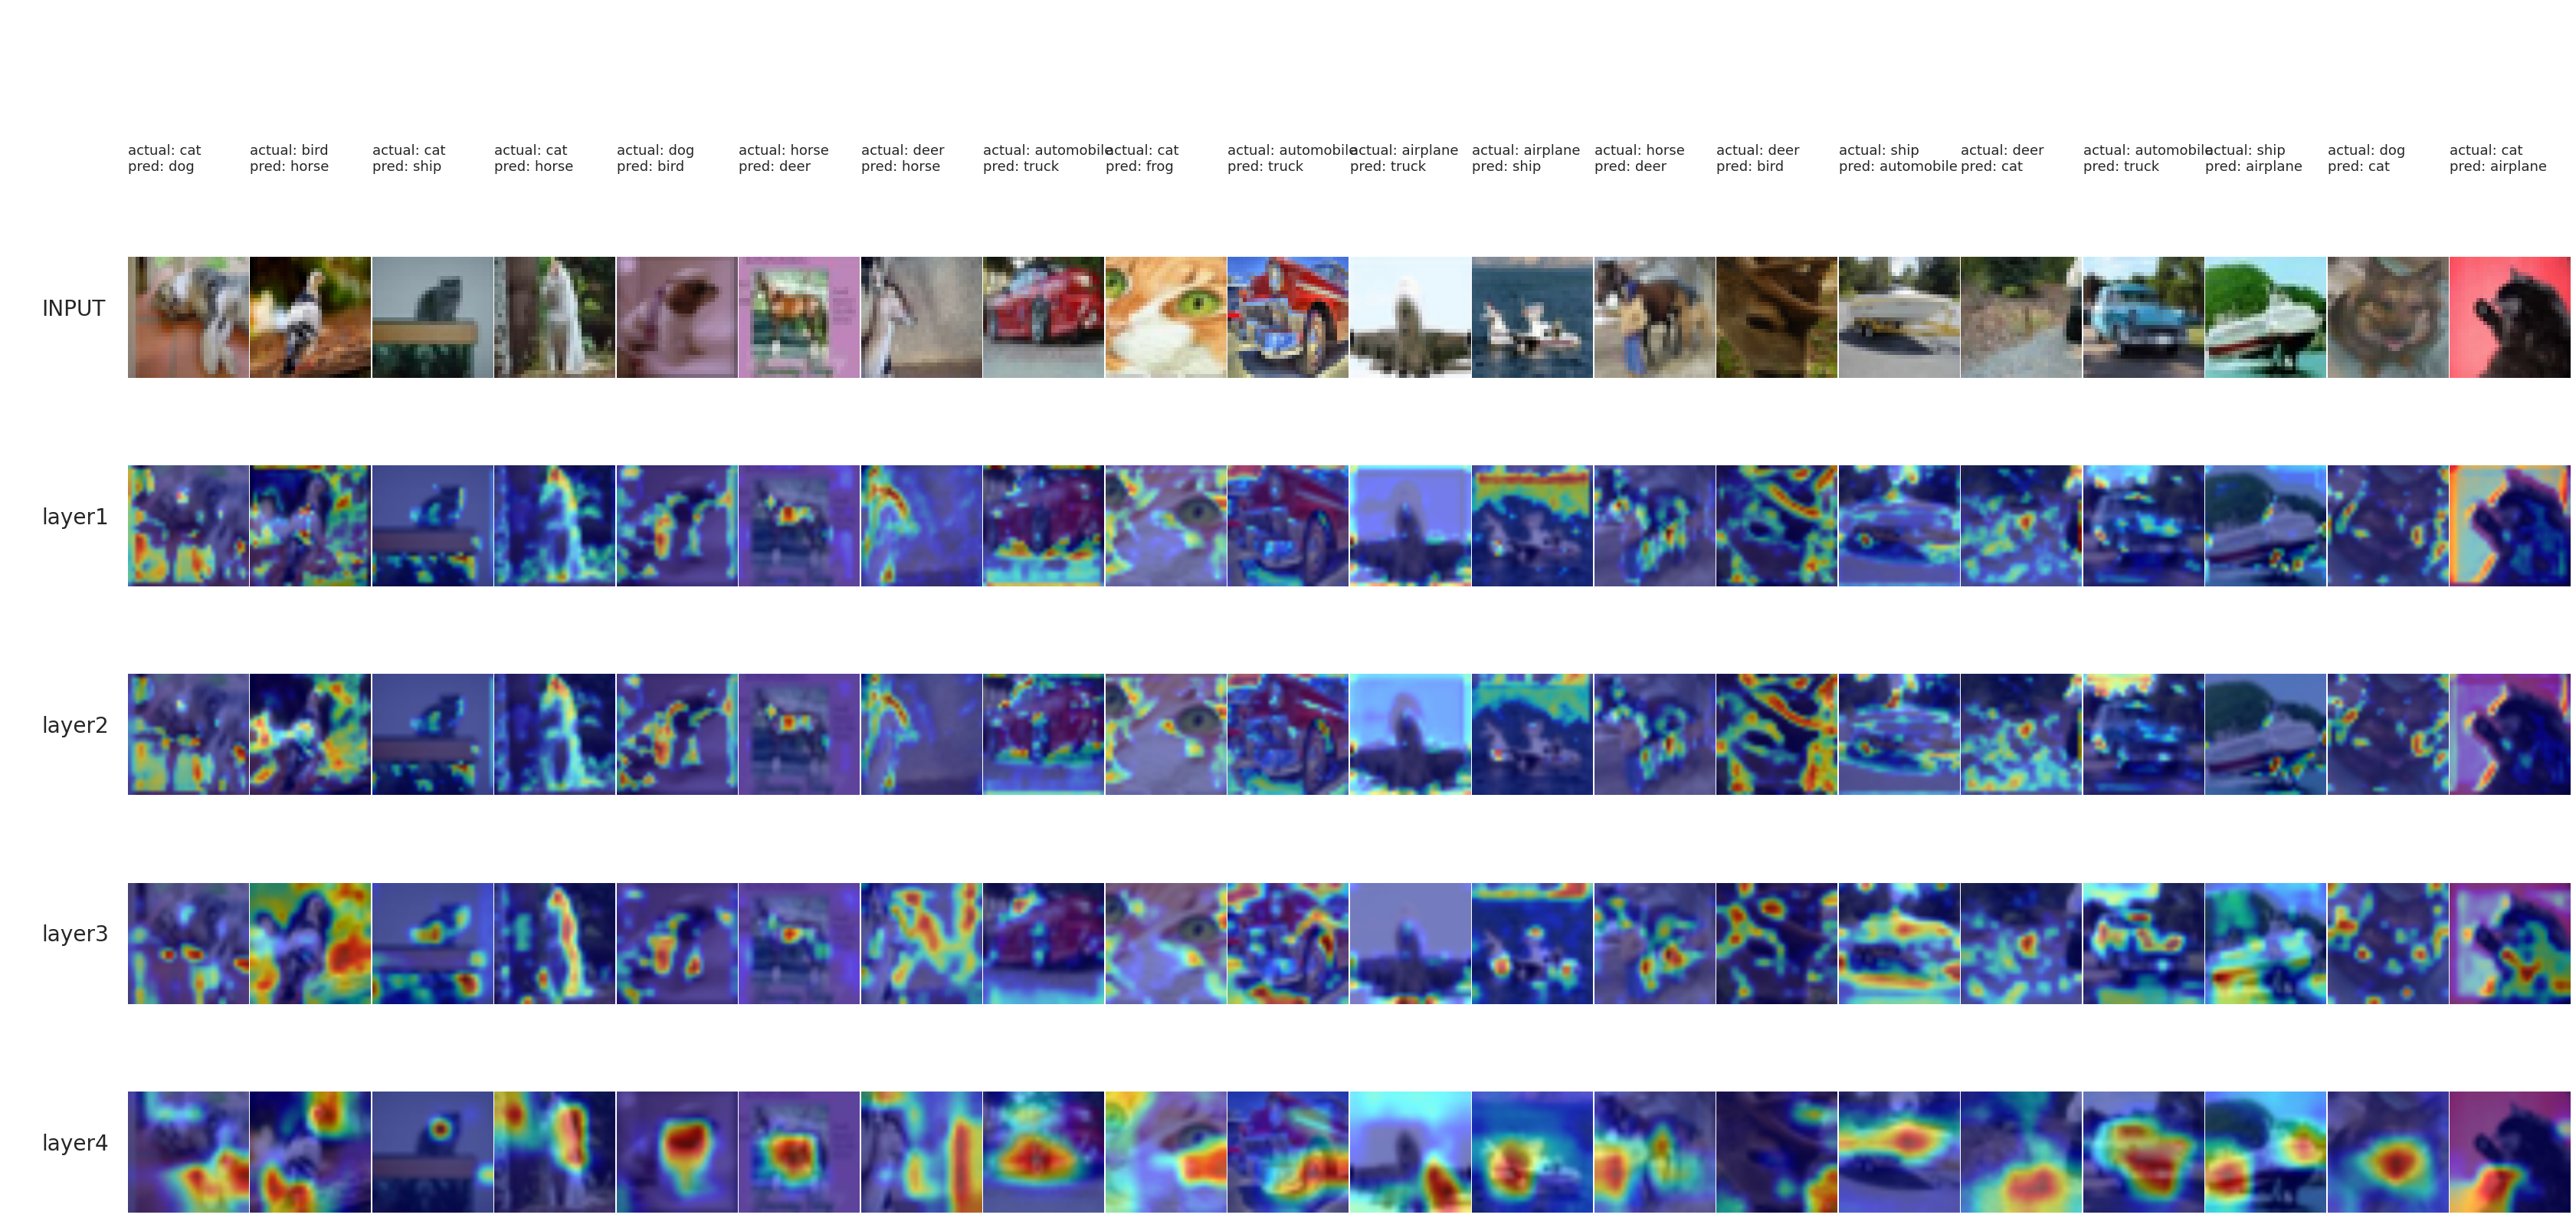

In [ ]:
plot_gradcam_images(gradcam_output, target_layers, classes, (3, 32, 32),predicted_classes, misclassified_images[:20])